<a href="https://colab.research.google.com/github/Maria-Bethania/on29-python-s09-pandas-numpy-I/blob/main/exercicios/para-casa/DesafioS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

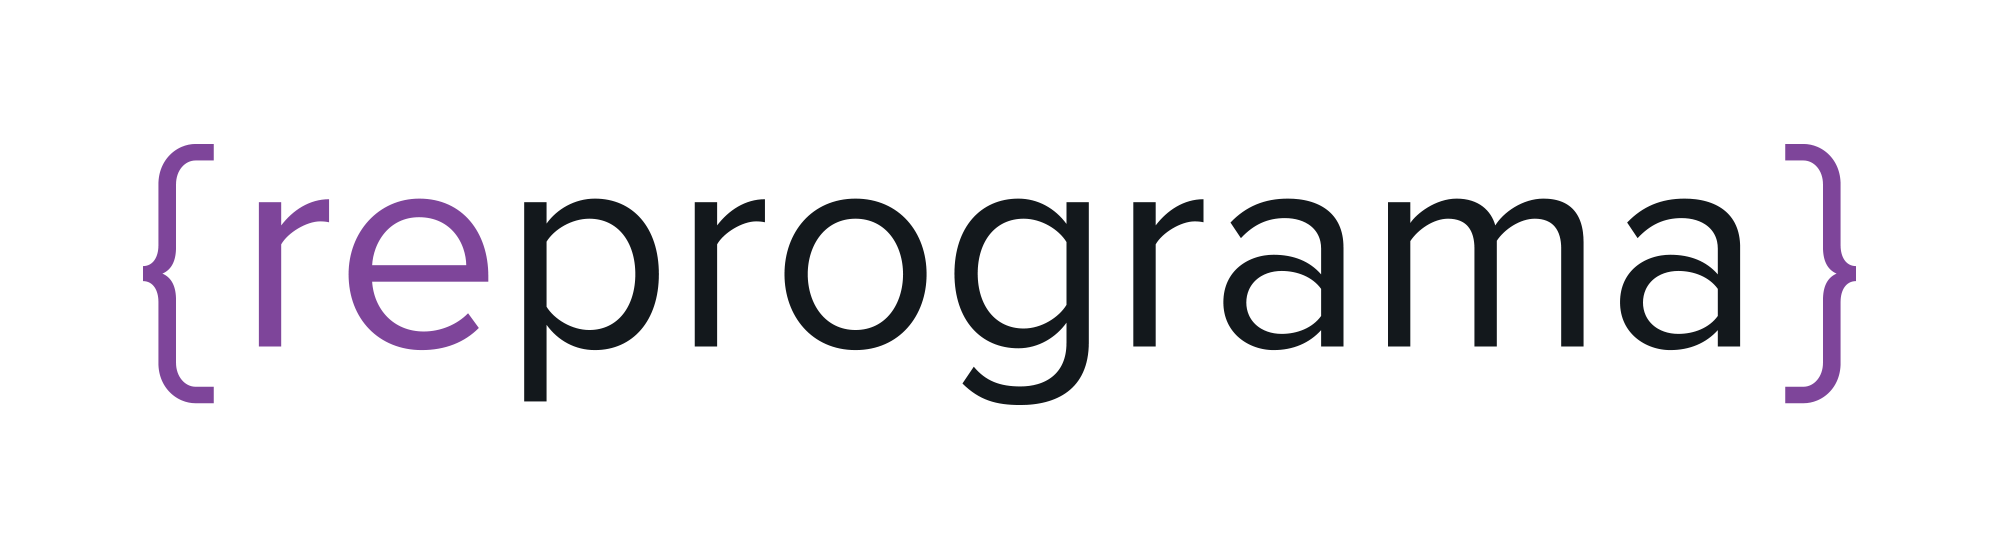

---
# Tratamento de Dados


## Descrição

* Utilizar a tabela de dados do clima e manipular os dados de acordo com as instruções abaixo:

      - Calcular a média da temperatura da amostra;
      - Retirar nulos da coluna 'RADIACAO GLOBAL (Kj/m2)';
      - Copiar o dataframe reduzindo para 3 colunas (a sua escolha) e 1000 linhas (aleatórias);
      - Normalizar coluna (qualquer uma)
      - Pesquisar sobre outras formas de processamento de dados;

## Importações

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np  

## Extração

In [2]:
df = pd.read_csv('/content/data_sample_RN.csv', sep = ";", encoding = "latin-1")


In [3]:
# Verificando os 3 primeiros registros
df.head(3)


,Data,Hora UTC,PRECIPITAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m2),TEMPERATURA DO AR - BULBO SECO. HORARIA (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),...,VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s),REGIAO,UF,ESTACAO,CODIGO (WMO),LATITUDE,LONGITUDE,ALTITUDE,DATA DE FUNDACAO
0,2022/12/28,2100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,CAICO,A316,-6.467500,-37.085000,171.26,07/01/07
1,2020/04/12,0700 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,SANTA CRUZ,A367,-6.227922,-36.026587,227.49,17/08/10
2,2022/07/31,0000 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,SANTA CRUZ,A367,-6.228056,-36.026667,227.49,17/08/10


In [4]:
# Verificando os 3 últimos registros
df.tail(3)

,Data,Hora UTC,PRECIPITAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m2),TEMPERATURA DO AR - BULBO SECO. HORARIA (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),...,VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s),REGIAO,UF,ESTACAO,CODIGO (WMO),LATITUDE,LONGITUDE,ALTITUDE,DATA DE FUNDACAO
99997,2022/08/19,0800 UTC,0.0,1011.9,1011.9,1011.6,NaN,20.4,16.2,21.4,...,3.0,1.7,NE,RN,MACAU,A317,-5.151111,-36.573056,17.37,06/01/07
99998,2021/02/12,1500 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,SANTA CRUZ,A367,-6.228056,-36.026667,227.49,17/08/10
99999,2022/09/28,0100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,IPANGUACU,A372,-5.535000,-36.872222,19.00,08/11/17


## Pré-análise

In [5]:
# Verificando o tamanho da base de dados
linhas, colunas = df.shape
print(f"A base de dados tem {linhas} linhas e {colunas} colunas.")

A base de dados tem 100000 linhas e 27 colunas.


In [6]:
# Visualização do df de forma aleatória
# sample() - Retorna uma amostra aleatória de linhas de um DataFrame
df.sample(10)

,Data,Hora UTC,PRECIPITAO TOTAL. HORARIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m2),TEMPERATURA DO AR - BULBO SECO. HORARIA (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),...,VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s),REGIAO,UF,ESTACAO,CODIGO (WMO),LATITUDE,LONGITUDE,ALTITUDE,DATA DE FUNDACAO
11494,2020/07/25,2000 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,IPANGUACU,A372,-5.534867,-36.872313,19.00,08/11/17
34922,2021/03/15,1800 UTC,0.0,1005.8,1006.3,1005.8,1154.7,32.9,20.9,35.9,...,9.0,6.1,NE,RN,IPANGUACU,A372,-5.535000,-36.872222,19.00,08/11/17
87817,2022/03/23,0700 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,APODI,A340,-5.626667,-37.815000,131.41,14/11/07
20842,2022/09/02,0800 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,CAICO,A316,-6.467500,-37.085000,171.26,07/01/07
10088,2020/07/25,1600 UTC,0.0,1008.3,1008.9,1008.3,3042.5,29.2,20.0,29.5,...,13.2,5.9,NE,RN,NATAL,A304,-5.837222,-35.208056,47.46,24/02/03
61560,2021/01/01,0400 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,CAICO,A316,-6.467500,-37.085000,171.26,07/01/07
50171,2021/01/23,1100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,SANTA CRUZ,A367,-6.228056,-36.026667,227.49,17/08/10
79281,2022/04/09,0200 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,APODI,A340,-5.626667,-37.815000,131.41,14/11/07
49623,2021/03/28,1100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,RN,CALCANHAR,A344,-5.160000,-35.487500,9.82,08/05/08
35159,2022/10/03,1100 UTC,0.0,990.5,990.5,990.2,1866.5,27.1,15.8,27.1,...,6.6,2.5,NE,RN,SANTA CRUZ,A367,-6.228056,-36.026667,227.49,17/08/10


In [7]:
# Contando a quantidade de observações
df.count()

Data                                                     100000
Hora UTC                                                 100000
PRECIPITAO TOTAL. HORARIO (mm)                            31766
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)     35796
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           35575
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          35583
RADIACAO GLOBAL (Kj/m2)                                   22539
TEMPERATURA DO AR - BULBO SECO. HORARIA (C)               35842
TEMPERATURA DO PONTO DE ORVALHO (C)                       34457
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)                 35625
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)                 35625
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)           34211
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)           34211
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                  34082
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                  34089
UMIDADE RELATIVA DO AR. HORARIA (%)     

In [8]:
# Verificando dados nulos e ausentes
df.isnull().sum()

Data                                                         0
Hora UTC                                                     0
PRECIPITAO TOTAL. HORARIO (mm)                           68234
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)    64204
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          64425
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         64417
RADIACAO GLOBAL (Kj/m2)                                  77461
TEMPERATURA DO AR - BULBO SECO. HORARIA (C)              64158
TEMPERATURA DO PONTO DE ORVALHO (C)                      65543
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)                64375
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)                64375
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)          65789
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)          65789
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 65918
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 65911
UMIDADE RELATIVA DO AR. HORARIA (%)                    

In [9]:
# Calculando a porcentagem de dados nulos em cada coluna
nulos_percent = (df.isnull().sum() / len(df)) * 100

print(nulos_percent.round(2))

Data                                                      0.00
Hora UTC                                                  0.00
PRECIPITAO TOTAL. HORARIO (mm)                           68.23
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)    64.20
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          64.42
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         64.42
RADIACAO GLOBAL (Kj/m2)                                  77.46
TEMPERATURA DO AR - BULBO SECO. HORARIA (C)              64.16
TEMPERATURA DO PONTO DE ORVALHO (C)                      65.54
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)                64.38
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)                64.38
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)          65.79
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)          65.79
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 65.92
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 65.91
UMIDADE RELATIVA DO AR. HORARIA (%)                    

In [10]:
# Verificando o tipo de dado em cada coluna
df.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAO TOTAL. HORARIO (mm)                           float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)    float64
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m2)                                  float64
TEMPERATURA DO AR - BULBO SECO. HORARIA (C)              float64
TEMPERATURA DO PONTO DE ORVALHO (C)                      float64
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)                float64
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)                float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)          float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)          float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR. H

In [11]:
# Informações detalhadas sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Data                                                   100000 non-null  object 
 1   Hora UTC                                               100000 non-null  object 
 2   PRECIPITAO TOTAL. HORARIO (mm)                         31766 non-null   float64
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)  35796 non-null   float64
 4   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        35575 non-null   float64
 5   PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       35583 non-null   float64
 6   RADIACAO GLOBAL (Kj/m2)                                22539 non-null   float64
 7   TEMPERATURA DO AR - BULBO SECO. HORARIA (C)            35842 non-null   float64
 8   TEMPERATURA DO PONTO DE ORVALHO (C)

In [12]:
# Verificando todas as colunas do df
df.columns

Index(['Data', 'Hora UTC', 'PRECIPITAO TOTAL. HORARIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m2)',
       'TEMPERATURA DO AR - BULBO SECO. HORARIA (C)',
       'TEMPERATURA DO PONTO DE ORVALHO (C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR. HORARIA (%)',
       'VENTO. DIREAO HORARIA (gr) ((gr))', 'VENTO. RAJADA MAXIMA (m/s)',
       'VENTO. VELOCIDADE HORARIA (m/s)', 'REGIAO', 'UF', 'ESTACAO',
       'CODIGO (WMO)', 'LATITUDE', 'LONGITUDE', 'ALTITUDE',
       'DATA DE FUNDACAO'],
      dtype='object')

In [13]:
# Resumo da análise estatística
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
PRECIPITAO TOTAL. HORARIO (mm),31766.0,0.11,1.13,0.00,0.00,0.00,0.00,55.20
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),35796.0,1003.38,7.67,977.90,996.60,1006.60,1009.50,1045.60
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),35575.0,1003.72,7.62,977.90,996.90,1007.00,1009.80,1048.90
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),35583.0,1003.11,7.68,977.60,996.30,1006.40,1009.20,1048.60
RADIACAO GLOBAL (Kj/m2),22539.0,1785.10,1161.55,0.00,739.15,1819.80,2760.35,7386.40
TEMPERATURA DO AR - BULBO SECO. HORARIA (C),35842.0,28.29,3.67,15.80,25.50,28.00,30.80,38.70
TEMPERATURA DO PONTO DE ORVALHO (C),34457.0,20.35,3.41,4.10,18.30,21.00,22.80,32.40
TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),35625.0,28.93,3.84,16.40,25.90,28.60,31.60,40.10
TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),35625.0,27.54,3.47,15.60,24.90,27.30,29.80,38.20
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),34211.0,20.93,3.29,5.30,19.00,21.50,23.30,32.70


In [14]:
# Análise

## Transformação

In [15]:
# Renomeando as colunas

df.rename(columns={
    'Data': 'Data',
    'Hora UTC': 'Hora_UTC',
    'PRECIPITAO TOTAL. HORARIO (mm)': 'Precipitacao_Total',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)': 'Pressao_Atm_Estacao',
    'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Pressao_Atm_Max',
    'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Pressao_Atm_Min',
    'RADIACAO GLOBAL (Kj/m2)': 'Radiacao_Global',
    'TEMPERATURA DO AR - BULBO SECO. HORARIA (C)': 'Temp_Ar',
    'TEMPERATURA DO PONTO DE ORVALHO (C)': 'Temp_Ponto_Orvalho',
    'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)': 'Temp_Max',
    'TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)': 'Temp_Min',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)': 'Temp_Orvalho_Max',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)': 'Temp_Orvalho_Min',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Umidade_Rel_Max',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Umidade_Rel_Min',
    'UMIDADE RELATIVA DO AR. HORARIA (%)': 'Umidade_Rel_Ar',
    'VENTO. DIREAO HORARIA (gr) ((gr))': 'Vento_Direcao',
    'VENTO. RAJADA MAXIMA (m/s)': 'Vento_Rajada_Max',
    'VENTO. VELOCIDADE HORARIA (m/s)': 'Vento_Velocidade',
    'REGIAO': 'Regiao',
    'UF': 'UF',
    'ESTACAO': 'Estacao',
    'CODIGO (WMO)': 'Codigo_WMO',
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'ALTITUDE': 'Altitude',
    'DATA DE FUNDACAO': 'Data_Fundacao'
}, inplace=True)


In [16]:
# Tamanho atual da base de dados
linhas, colunas = df.shape
print(f"Tamanho atual: {linhas} linhas e {colunas} colunas.")
print(20*'**')

# Removendo todas as observações contendo nuulos e ausentes
df_limpo = df.dropna()

# Tamanho da base de dados após limpeza
linhas, colunas = df_limpo.shape
print(f"Tamanho atual: {linhas} linhas e {colunas} colunas.")


Tamanho atual: 100000 linhas e 27 colunas.
****************************************
Tamanho atual: 18976 linhas e 27 colunas.


In [20]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18976 entries, 4 to 99993
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 18976 non-null  datetime64[ns]
 1   Hora_UTC             18976 non-null  object        
 2   Precipitacao_Total   18976 non-null  float64       
 3   Pressao_Atm_Estacao  18976 non-null  float64       
 4   Pressao_Atm_Max      18976 non-null  float64       
 5   Pressao_Atm_Min      18976 non-null  float64       
 6   Radiacao_Global      18976 non-null  float64       
 7   Temp_Ar              18976 non-null  float64       
 8   Temp_Ponto_Orvalho   18976 non-null  float64       
 9   Temp_Max             18976 non-null  float64       
 10  Temp_Min             18976 non-null  float64       
 11  Temp_Orvalho_Max     18976 non-null  float64       
 12  Temp_Orvalho_Min     18976 non-null  float64       
 13  Umidade_Rel_Max      18976 non-null 

In [18]:

# Convertendo a coluna de data
df_limpo['Data'] = pd.to_datetime(df_limpo['Data'], format='%Y/%m/%d')

# Extraindo o ano da coluna de data
df_limpo['Ano'] = df_limpo['Data'].dt.year

# Agrupando por ano e calculando o atributo a ser trabalhado
precip_agrupado = df_limpo.groupby('Ano')['Precipitacao_Total']

# Calculando as métricas
precip_min = precip_agrupado.min().round(2)
precip_max = precip_agrupado.max().round(2)
precip_soma = precip_agrupado.sum().round(2)
precip_media = precip_agrupado.mean().round(2)

# Criando um DataFrame com os resultados
resultados_por_ano = pd.DataFrame({
    'Ano': precip_min.index,
    'Mínimo': precip_min.values,
    'Máximo': precip_max.values,
    'Soma': precip_soma.values,
    'Média': precip_media.values
})

display(resultados_por_ano)


<ipython-input-18-96228ef0bab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Data'] = pd.to_datetime(df_limpo['Data'], format='%Y/%m/%d')
<ipython-input-18-96228ef0bab2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Ano'] = df_limpo['Data'].dt.year


,Ano,Mínimo,Máximo,Soma,Média
0,2020,0.0,55.2,1260.8,0.15
1,2021,0.0,24.4,191.6,0.05
2,2022,0.0,33.8,464.4,0.07


In [22]:
# Reduzinho o DF para 1000 linhas e somente 3 colunas

df_reduzido = df_limpo[['Data', 'Precipitacao_Total', 'Temp_Ar', 'Radiacao_Global']]
df_reduzido = df_reduzido.head(1000)
display(df_reduzido)

,Data,Precipitacao_Total,Temp_Ar,Radiacao_Global
4,2022-01-14,0.0,29.3,2298.8
7,2022-11-04,0.0,33.2,2526.5
11,2022-03-20,1.0,25.5,4198.6
13,2020-09-26,0.0,29.0,1488.7
14,2020-10-28,0.0,34.1,2675.1
...,...,...,...,...
5363,2020-01-15,0.0,30.6,2020.9
5364,2020-03-08,0.0,24.0,84.4
5379,2020-01-23,0.0,31.0,2162.4
5388,2020-10-19,0.0,35.7,3484.2


## Calculando a média da temperatura

In [24]:
# Calcular a média da temperatura da amostra
media_temp = df_reduzido['Temp_Ar'].mean().round(1)
print("Média da temperatura:", media_temp, 'graus Celsius.')


Média da temperatura: 29.7 graus Celsius.


## Normalização de uma coluna

In [27]:
coluna = "Radiacao_Global"

df_reduzido[coluna] = (df_reduzido[coluna] - df_reduzido[coluna].min()) / (df_reduzido[coluna].max() - df_reduzido[coluna].min())

display(df_reduzido[coluna].round(1))


4       0.4
7       0.4
11      0.6
13      0.2
14      0.4
       ... 
5363    0.3
5364    0.0
5379    0.3
5388    0.5
5389    0.5
Name: Radiacao_Global, Length: 1000, dtype: float64